# Libraries 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

# Data 

In [4]:
sexism = pd.read_csv('sexism.csv', sep=",")

In [5]:
sexism.head(3)

,Tweets,Label
0,@TVBachelor @NewJerzeyBoy what about the femin...,1
1,@ThelmaSleaze uh... did you watch the video? o...,1
2,Managed to hit a bird and a small rodent on my...,1


In [6]:
sexism.shape

(20842, 2)

In [7]:
sexism['Label'].value_counts()

0    16844
1     3998
Name: Label, dtype: int64

**Clean & Split Data**

In [8]:
from DPreprocessing import data_cleaning
X = data_cleaning(sexism['Tweets'])
y = sexism['Label']

>>>>>> Data Cleaning Process : Start
>>> Normalization | Remove ids @ | Replace urls by URL tag | Remove Special char | Remove Punctuation 


# Preprocessing

### Canonization

In [9]:
%%time 
# Lemmatization 

from DPreprocessing import canonization
from Vectorizer import bag_of_words

X_lem = canonization(X, method="lemmatization")
X_lem_bow = bag_of_words(X_lem, nbr_tokens=1000)

CPU times: user 2min 5s, sys: 543 ms, total: 2min 5s
Wall time: 2min 6s


In [10]:
%%time 
# Stemming 

from DPreprocessing import canonization
from Vectorizer import bag_of_words

X_stem = canonization(X, method="stemming")
X_stem_bow = bag_of_words(X_stem, nbr_tokens=1000)

CPU times: user 5.4 s, sys: 135 ms, total: 5.54 s
Wall time: 5.71 s


In [11]:
# Lemmatization vs Stemming 

#----------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lem_bow, y, test_size=0.30, random_state=42, shuffle=True)

from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
f1_score_lem = f1_score(y_test, y_pred)
accuracy_lem = accuracy_score(y_test, y_pred)

#----------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stem_bow, y, test_size=0.30, random_state=42, shuffle=True)

from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
f1_score_stem = f1_score(y_test, y_pred)
accuracy_stem = accuracy_score(y_test, y_pred)

#----------------------------------------------------
print("F1 Score (Lemmatization) = ", f1_score_lem)
print("Accuracy (Lemmatization) = ", accuracy_lem, "\n")

print("F1 Score (Stemming) = ", f1_score_stem)
print("Accuracy (Stemming) = ", accuracy_stem)

F1 Score (Lemmatization) =  0.6290322580645161
Accuracy (Lemmatization) =  0.8822964976811131 

F1 Score (Stemming) =  0.6355974219137333
Accuracy (Stemming) =  0.8824564209179594


## Vectorization

In [24]:
%%time 
# Bag of words
from Vectorizer import bag_of_words
X_lem_bow = bag_of_words(X_lem, nbr_tokens=1000)

CPU times: user 535 ms, sys: 53.8 ms, total: 589 ms
Wall time: 592 ms


In [25]:
%%time 
# Tfidf + Lemmatization 
from Vectorizer import tfidf
X_lem_tfidf = tfidf(X_lem, nbr_tokens=1000, ngram=1)

CPU times: user 326 ms, sys: 35.1 ms, total: 361 ms
Wall time: 371 ms


In [26]:
%%time 
# Hashing + Lemmatization
from Vectorizer import hashing
X_lem_hashing = hashing(X_lem, nbr_tokens=1000)

CPU times: user 291 ms, sys: 39.8 ms, total: 331 ms
Wall time: 339 ms


In [27]:
# Compaison 

#----------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lem_bow, y, test_size=0.30, random_state=42, shuffle=True)

from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
f1_score_bow = f1_score(y_test, y_pred)
accuracy_bow = accuracy_score(y_test, y_pred)

#----------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lem_tfidf, y, test_size=0.30, random_state=42, shuffle=True)

from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
f1_score_tfidf = f1_score(y_test, y_pred)
accuracy_tfidf = accuracy_score(y_test, y_pred)

#----------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lem_hashing, y, test_size=0.30, random_state=42, shuffle=True)

from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
f1_score_hashing = f1_score(y_test, y_pred)
accuracy_hashing = accuracy_score(y_test, y_pred)

#----------------------------------------------------
print("F1 Score (Bag Of Words) = ", f1_score_bow)
print("Accuracy (Bag Of Words) = ", accuracy_bow, "\n")

print("F1 Score (TFIDF) = ", f1_score_tfidf)
print("Accuracy (TFIDF) = ", accuracy_tfidf, "\n")

print("F1 Score (Hashing) = ", f1_score_hashing)
print("Accuracy (Hashing) = ", accuracy_hashing)

F1 Score (Bag Of Words) =  0.6290322580645161
Accuracy (Bag Of Words) =  0.8822964976811131 

F1 Score (TFIDF) =  0.6177526936890714
Accuracy (TFIDF) =  0.8808571885494962 

F1 Score (Hashing) =  0.48686514886164617
Accuracy (Hashing) =  0.8594274748120901


### Feature Engineering 

**Polarity**

In [28]:
polarity_ = polarity(X)

**Length**

In [29]:
length = len_tweets(X_lem)

**Subjectivity**

In [30]:
subjectivity_ = subjectivity(X)  

**NER features**

In [31]:
%%time
from DPreprocessing import data_cleaning 
import spacy
ner = named_entity_recognition(X_lem)
ner_categories = ner['Label'].value_counts()[ner['Label'].value_counts() > 1000].index.tolist()

ner_features_index = []
for category in ner_categories :
    #NER[NER['Label']==category].value_counts()[:30].plot(kind='bar', color=colors_list)
    #plt.show()
    condition = ner['Text'][ner['Label']==category].value_counts()>50
    element = ner['Text'][ner['Label']==category].value_counts()[condition].index.tolist()
    ner_features_index.extend(element)

ner_features = newfeatures(ner_features_index, X_lem) 

CPU times: user 2min 10s, sys: 847 ms, total: 2min 11s
Wall time: 2min 11s


**N-Gram**

In [32]:
# Unigram 
unigram = ngram(X_lem, nbr_gram=1, stopwords='english')
unigram = ngrams_frequency(X_lem, unigram)
unigram_100 = unigram['Gram'][:100]
unigram_features = newfeatures(unigram_100, X_lem) 

<AxesSubplot:xlabel='Gram'>

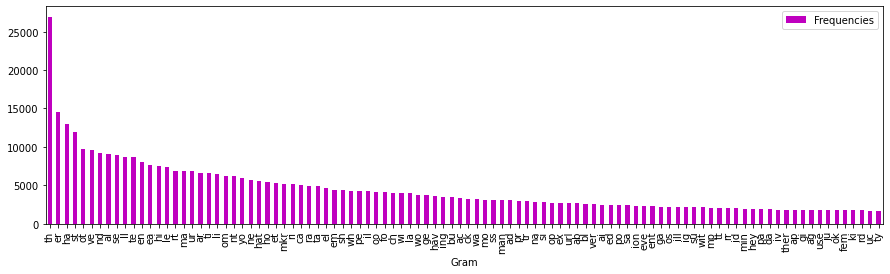

In [33]:
unigram[:100].plot(x='Gram', y='Frequencies', kind='bar', color='m', figsize=(15,4))

In [34]:
# Bigram 
bigram = ngram(X_lem, nbr_gram=2, stopwords='english')
bigram = ngrams_frequency(X_lem, bigram)
bigram_100 = bigram['Gram'][:100]
bigram_features = newfeatures(bigram_100, X_lem)

<AxesSubplot:xlabel='Gram'>

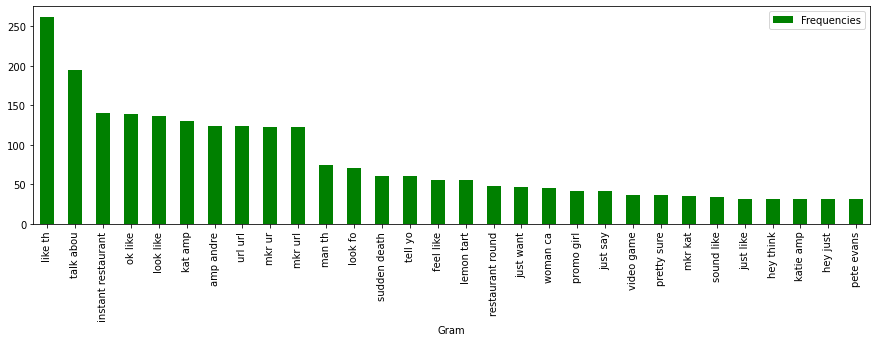

In [35]:
bigram[:30].plot(x='Gram', y='Frequencies', kind='bar', color='g', figsize=(15,4))

In [36]:
# Trigram 
trigram = ngram(X_lem, nbr_gram=3, stopwords='english')
trigram = ngrams_frequency(X_lem, trigram)
trigram_100 = trigram['Gram'][:100]
trigram_features = newfeatures(trigram_100, X_lem)

<AxesSubplot:xlabel='Gram'>

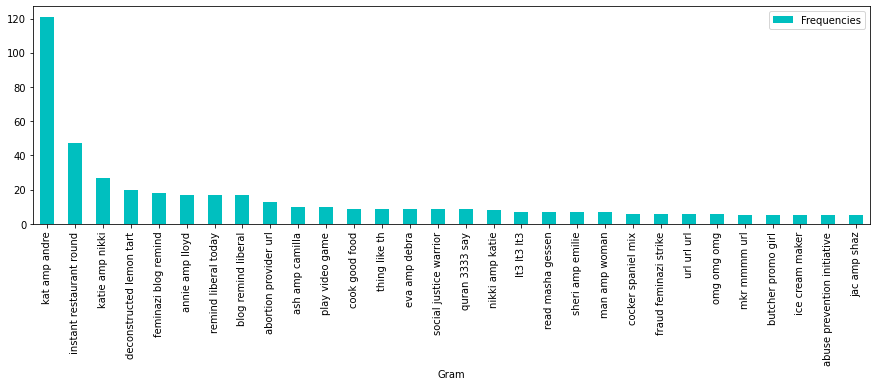

In [37]:
trigram[:30].plot(x='Gram', y='Frequencies', kind='bar', color='c', figsize=(15,4))

**Shallow Parsing**

**Dependency Parsing**

In [38]:
from tqdm import tqdm
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer

tweet_dependencies = dependency_graph(X_lem)

tf_idf = TfidfVectorizer(binary=True,smooth_idf=False,)
tweet_dependency_features = tf_idf.fit_transform(np.array(tweet_dependencies)).toarray()
tweet_dependency_features = pd.DataFrame(tweet_dependency_features)

**SIGNIFICANT FEATURES**

In [39]:
# Polarity 
newX = pd.concat([pd.DataFrame(X_lem_tfidf), polarity_], axis=1)
f1score_m1, accuracy_m1 = evaluation(newX)

In [40]:
# Length 
newX = pd.concat([pd.DataFrame(X_lem_tfidf), length], axis=1)
f1score_m2, accuracy_m2 = evaluation(newX)  

In [41]:
# Subjectivity 
newX = pd.concat([pd.DataFrame(X_lem_tfidf), subjectivity_], axis=1)
f1score_m3, accuracy_m3 = evaluation(newX)   

In [42]:
# NER features 
newX = pd.concat([pd.DataFrame(X_lem_tfidf), ner_features], axis=1)
f1score_m4, accuracy_m4 = evaluation(newX)

In [43]:
# Unigram 
newX = pd.concat([pd.DataFrame(X_lem_tfidf), unigram_features], axis=1)
f1score_m5, accuracy_m5 = evaluation(newX)

In [44]:
# Bigram 
newX = pd.concat([pd.DataFrame(X_lem_tfidf), bigram_features], axis=1)
f1score_m6, accuracy_m6 = evaluation(newX)

In [45]:
# Trigram 
newX = pd.concat([pd.DataFrame(X_lem_tfidf), trigram_features], axis=1)
f1score_m7, accuracy_m7 = evaluation(newX)

In [ ]:
# Shallow Parsing 
#newX = pd.concat([pd.DataFrame(X_lem_tfidf), ], axis=1)
#f1score_m8, accuracy_m8 = evaluation(newX)

In [46]:
# Dependency Parsing 
newX = pd.concat([pd.DataFrame(X_lem_tfidf), tweet_dependency_features], axis=1)
f1score_m9, accuracy_m9 = evaluation(newX)

In [47]:
m0 = ["Without",accuracy_tfidf,f1_score_tfidf]
m1 = ["Polarity",accuracy_m1,f1score_m1]
m2 = ["Length",accuracy_m2,f1score_m2]
m3 = ["Subjectivity",accuracy_m3,f1score_m3]
m4 = ["NER",accuracy_m4,f1score_m4]
m5 = ["Unigram",accuracy_m5,f1score_m5]
m6 = ["Bigram",accuracy_m6,f1score_m6]
m7 = ["Trigram",accuracy_m7,f1score_m7]
#m8 = ["Polarity",accuracy_m8,f1score_m8]
m9 = ["Dependency Parsing",accuracy_m9,f1score_m9]

In [48]:
results(m0,m1,m2,m3,m4,m5,m6,m7,m9)

,Methods,Accuracy,F1 Score
0,Without,0.880857,0.617753
1,Polarity,0.880537,0.616333
2,Length,0.880857,0.617753
3,Subjectivity,0.881017,0.618070
4,NER,0.881977,0.621150
5,Unigram,0.885335,0.645926
6,Bigram,0.881657,0.622449
7,Trigram,0.880857,0.617753
8,Dependency Parsing,0.882456,0.624809


# Modeling 

**Features**

In [49]:
Features = combine_features(X_lem_tfidf, length, subjectivity_, ner_features, trigram_features, tweet_dependency_features)

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, y, test_size=0.30, random_state=42, shuffle=True)

**SVM**

In [51]:
%%time
#f1_score_svm, accuracy_score_svm = evaluation(Features)
# Training & Evaluation 
from sklearn.svm import SVC 
model = SVC(kernel='linear', random_state=0)
model.fit(X_train, y_train)

# prediction 
y_pred = model.predict(X_test)

# evaluation 
from sklearn.metrics import accuracy_score, f1_score
f1_score_svm = f1_score(y_test, y_pred)
accuracy_svm = accuracy_score(y_test, y_pred)

CPU times: user 5min 55s, sys: 1.11 s, total: 5min 56s
Wall time: 5min 57s


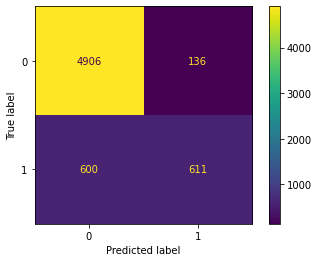

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

**Logistic Regression**

In [53]:
%%time
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# evaluation 
from sklearn.metrics import accuracy_score, f1_score
f1_score_logreg = f1_score(y_test, y_pred)
accuracy_logreg = accuracy_score(y_test, y_pred)

CPU times: user 4.12 s, sys: 245 ms, total: 4.37 s
Wall time: 1.29 s


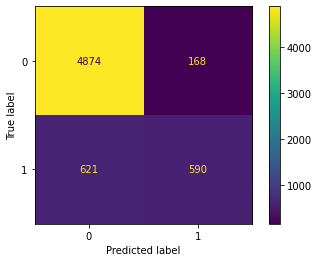

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

**Random Forest**

In [55]:
# training 
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

# prediction 
y_pred = model.predict(X_test)

# evaluation 
from sklearn.metrics import accuracy_score, f1_score
f1_score_rf = f1_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)

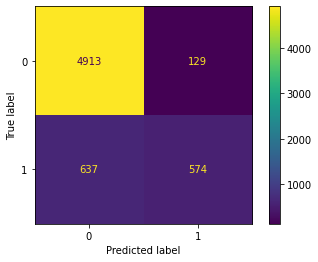

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

**Naive Bayes**

In [57]:
# training 
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# prediction 
y_pred = model.predict(X_test)

# evaluation 
from sklearn.metrics import accuracy_score, f1_score
f1_score_nb = f1_score(y_test, y_pred)
accuracy_nb = accuracy_score(y_test, y_pred)

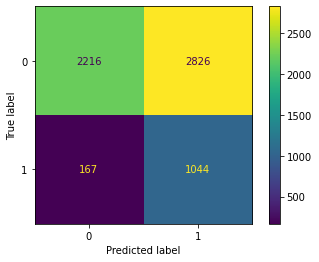

In [58]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.show()

# -------------------------------------------------------------

In [12]:
def newfeatures(newf, tweets):
    matrix = []
    for tweet in tweets:
        values = []
        for feature in newf:
            if feature in tweet: values.append(1)
            else: values.append(0)
        matrix.append(values)
    return pd.DataFrame(matrix, columns=newf)

In [13]:
def combine_features(X, *new_features):
    X = pd.DataFrame(X)
    F = pd.concat(list(new_features), axis=1)
    return pd.concat([F,X], axis=1)

In [14]:
def polarity(tweets):
    from textblob import TextBlob
    polarity = []
    for tweet in tweets: 
        pol = TextBlob(tweet)
        polarity.append(pol.sentiment.polarity)
    return pd.DataFrame(polarity)

In [15]:
def subjectivity(tweets):
    from textblob import TextBlob
    subjectivity = []
    for tweet in tweets: 
        pol = TextBlob(tweet)
        subjectivity.append(pol.sentiment.subjectivity)
    return pd.DataFrame(subjectivity)

In [16]:
def len_tweets(tweets):
    length = []
    for tweet in tweets:
        length.append(len(tweet))
    return pd.DataFrame(length)

In [17]:
def named_entity_recognition(tweets):
    nlp = spacy.load('en_core_web_sm')
    bloc = []
    for tweet in tweets: 
        doc = nlp(tweet)
        for ent in doc.ents:
            bloc.append([ent.text, ent.label_])
    return pd.DataFrame(bloc,columns=['Text','Label'])

In [18]:
def ngram(tweets, nbr_gram, stopwords):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(max_features=None, 
                                stop_words=stopwords,
                                ngram_range = (nbr_gram,nbr_gram)
                                )
    vectorizer.fit(tweets)
    vocab = list(vectorizer.vocabulary_.keys())
    
    return vocab 

In [19]:
def ngrams_frequency(tweets, grams):
    
    # all tweets in one single string 
    all_tweets = tweets.sum(axis=0)
    
    ngrams_frequency = []
    for gram in grams:
        ngrams_frequency.append([gram,all_tweets.count(gram)])
    
    matrix = pd.DataFrame(ngrams_frequency,columns=['Gram','Frequencies'])
    matrix.sort_values(by='Frequencies', ascending=False, inplace=True)
    return matrix

In [20]:
def dependency_graph(tweets):
    import spacy 
    nlp = spacy.load('en_core_web_sm')
    tweet_dependencies = []
    
    for tweet in tweets:
        doc = nlp(tweet)
        all_two_treelet = ""
        for token in doc:
            two_treelet = str(token.pos_) + " -> " + str(token.dep_) + " -> " + str(token.head.pos_)
            all_two_treelet += two_treelet + " | "
        tweet_dependencies.append(all_two_treelet)

    return pd.Series(tweet_dependencies)

In [21]:
def evaluation(X):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

    from sklearn.svm import SVC 
    model = SVC(kernel='linear', random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    from sklearn.metrics import accuracy_score, f1_score
    f1_score = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    return f1_score, accuracy

In [23]:
def results(*args):
    '''
        [Method,Accuracy,F1Score]
    '''
    
    methods_results = []
    for method in args:
        methods_results.append(method)
    return pd.DataFrame(methods_results,columns=["Methods","Accuracy","F1 Score"]) 